# UCI Occupancy Detection dataset

In [18]:
import pandas as pd
import os
from pathlib import Path
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [20]:
dataset_collection_name = "Occupancy"
source_folder = Path(data_raw_folder) / "UCI ML Repository/Occupancy Detection"
target_folder = Path(data_processed_folder)

from pathlib import Path
print(f"Looking for source datasets in {source_folder.absolute()} and\nsaving processed datasets in {target_folder.absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Occupancy Detection and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


## Dataset transformation and pre-processing

In [21]:
train_type = "supervised"
train_is_normal = False
input_type = "multivariate"
datetime_index = True
dataset_type = "real"

# create target directory
dataset_subfolder = os.path.join(input_type, dataset_collection_name)
target_subfolder = os.path.join(target_folder, dataset_subfolder)
try:
    os.makedirs(target_subfolder)
    print(f"Created directories {target_subfolder}")
except FileExistsError:
    print(f"Directories {target_subfolder} already exist")
    pass

dm = Datasets(target_folder)

Directories /home/projects/akita/data/benchmark-data/data-processed/multivariate/Occupancy already exist


In [22]:
def transform_dataset(source: Path, target: Path) -> int:
    df = pd.read_csv(source)
    df.insert(0, "timestamp", pd.to_datetime(df["date"]))
    df["is_anomaly"] = df["Occupancy"].astype(int)
    df = df.drop(columns=["date", "Occupancy"])
    df.to_csv(target, index=False)
    return len(df)

In [25]:
# transform training file
dataset_name = "room-occupancy"
training_filename = f"{dataset_name}.train.csv"
training_path = os.path.join(dataset_subfolder, training_filename)
target_filepath = os.path.join(target_subfolder, training_filename)
transform_dataset(source_folder / "datatraining.txt", target_filepath)
    

# get target filenames
for i, testfile in enumerate(["datatest.txt", "datatest2.txt"]):
    filename = f"{dataset_name}-{i}.test.csv"
    source_file = source_folder / testfile
    path = os.path.join(dataset_subfolder, filename)
    target_filepath = os.path.join(target_subfolder, filename)

    # transform file
    dataset_length = transform_dataset(source_file, target_filepath)
    print(f"Processed source dataset {source_file} -> {target_filepath}")

    # save metadata
    dm.add_dataset((dataset_collection_name, f"{dataset_name}-{i}"),
        train_path = training_path,
        test_path = path,
        dataset_type = dataset_type,
        datetime_index = datetime_index,
        split_at = None,
        train_type = train_type,
        train_is_normal = train_is_normal,
        input_type = input_type,
        dataset_length = dataset_length
    )

dm.save()

Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Occupancy Detection/datatest.txt -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Occupancy/room-occupancy-0.test.csv
Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/Occupancy Detection/datatest2.txt -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/Occupancy/room-occupancy-1.test.csv


In [26]:
dm.refresh()
dm._df.loc[slice(dataset_collection_name, dataset_collection_name)]

train_path  \
collection_name dataset_name                                                        
Occupancy       room-occupancy-0  multivariate/Occupancy/room-occupancy.train.csv   
                room-occupancy-1  multivariate/Occupancy/room-occupancy.train.csv   

                                                                         test_path  \
collection_name dataset_name                                                         
Occupancy       room-occupancy-0  multivariate/Occupancy/room-occupancy-0.test.csv   
                room-occupancy-1  multivariate/Occupancy/room-occupancy-1.test.csv   

                                 dataset_type  datetime_index  split_at  \
collection_name dataset_name                                              
Occupancy       room-occupancy-0         real            True       NaN   
                room-occupancy-1         real            True       NaN   

                                  train_type  train_is_normal    input_type  \
collection_name dataset_name                                                  
Occupancy       room-occupancy-0  supervised            False  multivariate   
                room-occupancy-1  supervised            False  multivariate   

                                  length  
collection_name dataset_name              
Occupancy       room-occupancy-0    2665  
                room-occupancy-1    9752

## Experimentation

In [13]:
source_file = source_folder / "datatest.txt"
df = pd.read_csv(source_file)
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [14]:
df1 = df.copy()
df1.insert(0, "timestamp", pd.to_datetime(df1["date"]))
df1["is_anomaly"] = df1["Occupancy"].astype(int)
df1 = df1.drop(columns=["date", "Occupancy"])
df1

,timestamp,Temperature,Humidity,Light,CO2,HumidityRatio,is_anomaly
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [15]:
df.iloc[500:1500]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
640,2015-02-02 22:38:59,20.7,22.456000,0.000000,460.600000,0.003385,0
641,2015-02-02 22:40:00,20.7,22.500000,0.000000,455.250000,0.003391,0
642,2015-02-02 22:40:59,20.7,22.500000,0.000000,455.666667,0.003391,0
643,2015-02-02 22:41:59,20.7,22.500000,0.000000,456.250000,0.003391,0
644,2015-02-02 22:43:00,20.7,22.426667,0.000000,459.666667,0.003380,0
...,...,...,...,...,...,...,...
1635,2015-02-03 15:14:00,23.0,30.000000,465.000000,1254.600000,0.005219,1
1636,2015-02-03 15:15:00,23.0,30.000000,461.000000,1261.200000,0.005219,1
1637,2015-02-03 15:16:00,23.0,30.000000,464.000000,1261.000000,0.005219,1
1638,2015-02-03 15:16:59,23.0,30.016667,462.333333,1263.666667,0.005222,1


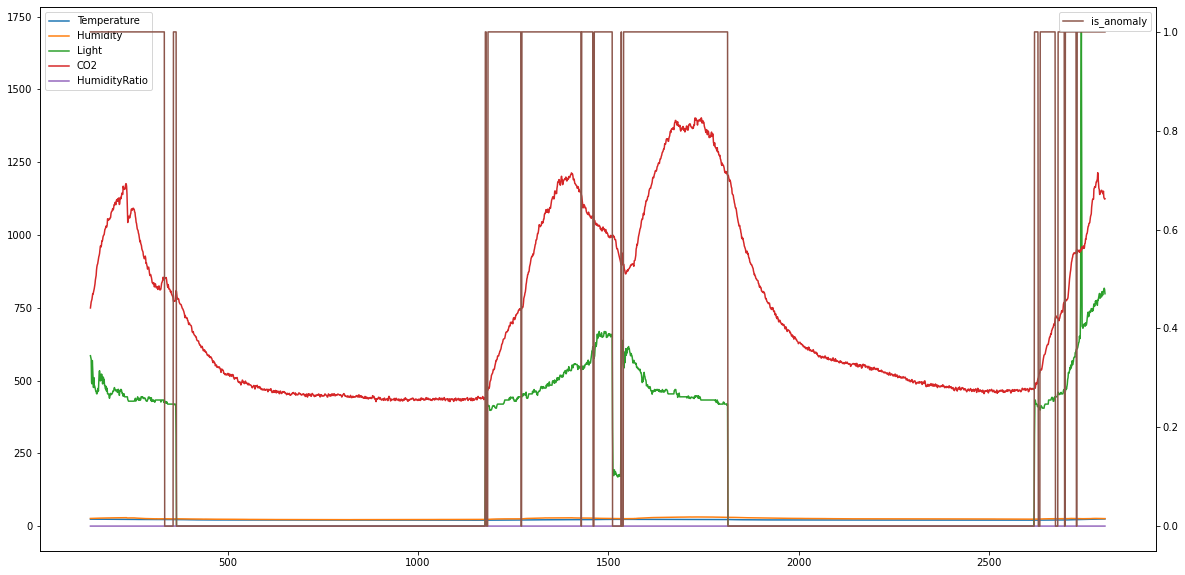

In [16]:
df1[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]].plot()
df1["is_anomaly"].plot(secondary_y=True)
plt.legend()
plt.show()